# Integrate and Fire

In [1]:
# LIBRARY

import numpy as np # vector manipulation

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm



In [35]:
dt=0.5
t=np.arange(0,1000,dt)

C_m=0.5
g_L=25
tau_m=C_m/g_L
V_L=-70
I_syn=np.concatenate((np.zeros(500),1*np.ones(len(t)-1000),np.zeros(500)))
I_syn=0.001*t+1
V_th=-50
E_L=V_reset=-65
V=V_L*np.ones(len(t))
for i in range(0,len(t)-1):
    V[i+1]=V[i]+dt*(1/C_m*(-g_L*V[i]+g_L*V_L-I_syn[i]))
    if V[i]>V_th:
        V[i]=0
        V[i+1]=V_L

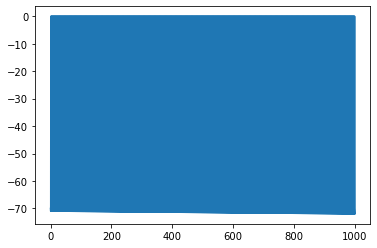

In [36]:
plt.plot(t,V)

In [31]:
tau_m=10
R_m=10
t_isi=0
V_exact=V
I_syn=0.001*t+1
for i in range(0,len(t)-1):
    V_exact[i+1]=E_L+R_m*I_syn[i]+(V_reset-E_L-R_m*I_syn[i])*np.exp(-(t[i+1]-t_isi)/tau_m)
    if V_exact[i]>V_th:
        V_exact[i]=0
        V[i+1]=V_L
        t_isi=t[i+1]


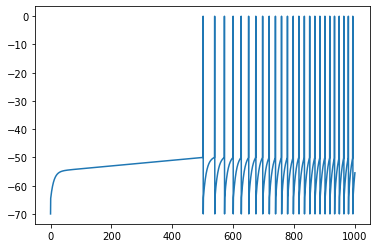

In [32]:
plt.plot(t,V_exact)


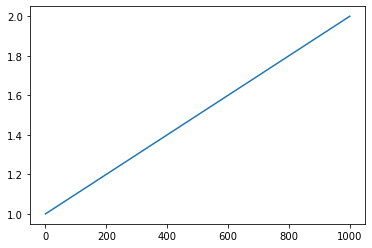

In [6]:
plt.plot(t,I_syn)



In [21]:
tau_m

0.02

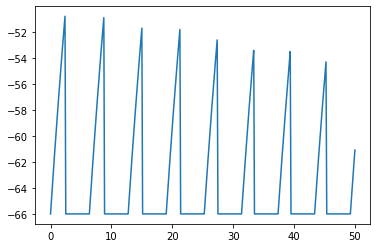

In [39]:
T= 50
dt=0.125
time=np.arange(0,T+dt,dt)
t_rest=0

# LIF parameters
Vm=-70*np.ones(len(time))
Rm=1
Cm=10
tau_m=Rm*Cm
tau_ref=4
Vth=-55
V_spike=0.5

I=1.5

for i,t in enumerate(time):
    if t >t_rest:
        Vm[i]=Vm[i-1]+(-Vm[i-1]+I*Rm)/tau_m*dt
        if Vm[i]>=Vth:
            Vm+=V_spike
            t_rest=t+tau_ref
            
plt.plot(time,Vm)

In [37]:
tau_m

0.02

In [43]:
# Na channel (activating)
alpha_m = np.vectorize(lambda v: 0.1*(-v + 25)/(exp((-v + 25)/10) - 1) if v != 25 else 1)
beta_m  = lambda v: 4*exp(-v/18)
# Na channel (inactivating)
alpha_h = lambda v: 0.07*exp(-v/20)
beta_h  = lambda v: 1/(exp((-v + 30)/10) + 1)
...
## Stimulus
I = np.zeros(len(time))
for i, t in enumerate(time):
  if 5 <= t <= 30: I[i] = 10 # uA/cm2
## Simulate Model
for i in range(1,len(time)):
  g_Na = gbar_Na*(m**3)*h
  g_K  = gbar_K*(n**4)
  g_l  = gbar_l
  m += dt*(alpha_m(Vm[i-1])*(1 - m) - beta_m(Vm[i-1])*m)
  h += dt*(alpha_h(Vm[i-1])*(1 - h) - beta_h(Vm[i-1])*h)
  n += dt*(alpha_n(Vm[i-1])*(1 - n) - beta_n(Vm[i-1])*n)
  Vm[i] = (Vm[i-1] + (I[i-1] - g_Na*(Vm[i-1] - E_Na) - g_K*(Vm[i-1] - E_K) - g_l*(Vm[i-1] - E_l)) /
           Cm * dt)

NameError: name 'gbar_Na' is not defined